<a href="https://colab.research.google.com/github/DevKumar57-67/House-Prediction-Model/blob/main/Bangalore_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [14]:
data = pd.read_csv("/bengaluru_house_prices.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [15]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
data.shape

(13320, 9)

In [17]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [18]:
data.nunique()

,0
area_type,4
availability,81
location,1305
size,31
society,2688
total_sqft,2117
bath,19
balcony,4
price,1994


In [19]:
data.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [20]:
data.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [21]:
data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [22]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


In [23]:
# prompt: Fill na and drop na is used for what

#Fill na and drop na are used for handling missing values in a dataset.

# .isnull() is used to check for missing values (NaN). It returns a boolean DataFrame
# where True indicates a missing value.

# .isnull().sum() provides the count of missing values in each column.

# .dropna() removes rows or columns with missing values.

# .fillna() fills missing values with a specified value (e.g., mean, median, mode,
# a constant value, or the result of an interpolation).


# In the provided code:

# data = data.drop(['society','balcony'], axis=1)
# This line drops the columns 'society' and 'balcony' from the DataFrame. This is done because
# they have a high percentage (more than 70%) of missing values, as determined previously in your analysis.
# Removing them improves data quality, prevents bias in statistical analysis, and potentially simplifies modeling.


# data['size'] = data['size'].fillna(data['size'].mode()[0])
# This fills missing values in the 'size' column with the most frequent value (the mode).
# This method is often used for categorical variables.


# data['bath'] = data['bath'].fillna(data['bath'].mean())
# This fills the missing values in the 'bath' column with the mean of the available bath values.
# This is a common method for numerical data where filling with the mean maintains the mean value.


# data['total_sqft'] = data['total_sqft'].fillna(data['total_sqft'].median())
# Here, missing values in the 'total_sqft' column are filled with the median of the data.
#  The median is more robust to outliers compared to the mean, so choosing it depends on your data.


# In summary, .drop() is used to remove entire columns,
# while .fillna() is used to replace missing values within a column.

In [24]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [25]:


'''
prompt: Explain the code for dropping data columns

The code you provided demonstrates how to drop columns from a Pandas DataFrame based on the percentage of missing values they contain.  Lets get to the key parts


1. **Calculate Missing Value Percentage:**
   ```python
   missing_percentage = (data.isnull().sum() / len(data)) * 100
   ```
   This line calculates the percentage of missing values (NaN) for each column in the DataFrame `data`.
   - `data.isnull().sum()`: Counts the number of missing values in each column.
   - `len(data)`: Gets the total number of rows in the DataFrame.
   - Dividing the missing value count by the total number of rows and multiplying by 100 gives the percentage of missing values per column.

2. **Identify Columns to Drop:**
   ```python
   columns_to_drop = missing_percentage[missing_percentage > 70].index
   ```
   This line identifies the columns that have more than 70% missing values.
   - `missing_percentage[missing_percentage > 70]`:  Filters the `missing_percentage` Series to keep only those columns where the percentage of missing values is greater than 70%.
   - `.index`: Extracts the column names (index labels) of the filtered columns.  These are the columns to be dropped.

3. **Drop the Columns (Commented out in your example):**
   ```python
   # data = data.drop(columns_to_drop, axis=1)
   ```
   This line (currently commented out) would actually perform the column dropping.
   - `data.drop(columns_to_drop, axis=1)`:  Removes the columns specified in the `columns_to_drop` list from the DataFrame `data`.
     - `columns_to_drop`: The list of column names to remove.
     - `axis=1`: Specifies that we are dropping columns (axis=0 would drop rows).

   **Important:**  The `data = ...` assignment is crucial.  In Pandas, many operations return a *new* DataFrame.  Without the assignment, the original `data` DataFrame would remain unchanged.  You must assign the result back to `data` to see the effect of the dropping.

**In summary:** The code efficiently identifies columns with a high proportion of missing values and provides the means to remove them, improving data quality for further analysis or modeling.  The commented-out line shows where the actual dropping would take place if uncommented.

'''

'\nprompt: Explain the code for dropping data columns\n\nThe code you provided demonstrates how to drop columns from a Pandas DataFrame based on the percentage of missing values they contain.  Lets get to the key parts\n\n\n1. **Calculate Missing Value Percentage:**\n   ```python\n   missing_percentage = (data.isnull().sum() / len(data)) * 100\n   ```\n   This line calculates the percentage of missing values (NaN) for each column in the DataFrame `data`.\n   - `data.isnull().sum()`: Counts the number of missing values in each column.\n   - `len(data)`: Gets the total number of rows in the DataFrame.\n   - Dividing the missing value count by the total number of rows and multiplying by 100 gives the percentage of missing values per column.\n\n2. **Identify Columns to Drop:**\n   ```python\n   columns_to_drop = missing_percentage[missing_percentage > 70].index\n   ```\n   This line identifies the columns that have more than 70% missing values.\n   - `missing_percentage[missing_percentage 

In [26]:
df= data.drop(['society', 'balcony'],axis=1)

In [27]:
df.head()

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [28]:
df.shape

(13320, 7)

In [29]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [30]:
df.nunique()

,0
area_type,4
availability,81
location,1305
size,31
total_sqft,2117
bath,19
price,1994


In [31]:
df.isnull()

,area_type,availability,location,size,total_sqft,bath,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False
13316,False,False,False,False,False,False,False
13317,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False


# MATHEMATICS AND STATISTICS

In [32]:
mean_price = df['price'].mean()
print(f"The mean of the 'price' column is: {mean_price}")

The mean of the 'price' column is: 112.5656265015015


In [33]:
median_price = df['price'].median()
print(f"The median of the 'price' column is: {median_price}")

The median of the 'price' column is: 72.0


In [34]:
# Assuming 'df' is your DataFrame (as defined in the previous code)
mode_price = df['price'].mode()
print(f"The mode of the 'price' column is: {mode_price}")

The mode of the 'price' column is: 0    75.0
Name: price, dtype: float64


# DATA VISUALISATION

In [35]:
# prompt: What is the purpose of data VISUALISATION only explanation
'''
Data visualization is the graphical representation of information and data.  It's used to make complex data more accessible, understandable, and visually appealing.  Its purpose is multifaceted:

* **Exploration and Discovery:** Visualizations help uncover patterns, trends, and outliers in data that might be missed through numerical analysis alone.  They allow for quick identification of correlations and relationships between variables.

* **Communication and Storytelling:** Visualizations effectively communicate insights from data to a broader audience, including those without technical expertise.  A well-designed visualization can tell a compelling story about the data, highlighting key findings and supporting conclusions.

* **Decision Making:** By presenting data visually, decision-makers can quickly grasp the implications of different scenarios and make informed choices. Visualizations can reveal potential risks and opportunities that might otherwise be overlooked.

* **Identifying Anomalies:**  Visualizations can highlight unusual data points or patterns that deviate significantly from the norm. These anomalies can indicate errors in data collection or potential areas of interest for further investigation.

* **Faster Understanding:** The human brain processes visual information much faster than text or numbers. Visualizations provide a concise summary of complex data, enabling quicker comprehension of key insights.

In essence, data visualization transforms raw data into actionable knowledge, making it a crucial tool in various fields, including business, science, and engineering.

'''

"\nData visualization is the graphical representation of information and data.  It's used to make complex data more accessible, understandable, and visually appealing.  Its purpose is multifaceted:\n\n* **Exploration and Discovery:** Visualizations help uncover patterns, trends, and outliers in data that might be missed through numerical analysis alone.  They allow for quick identification of correlations and relationships between variables.\n\n* **Communication and Storytelling:** Visualizations effectively communicate insights from data to a broader audience, including those without technical expertise.  A well-designed visualization can tell a compelling story about the data, highlighting key findings and supporting conclusions.\n\n* **Decision Making:** By presenting data visually, decision-makers can quickly grasp the implications of different scenarios and make informed choices. Visualizations can reveal potential risks and opportunities that might otherwise be overlooked.\n\n* *

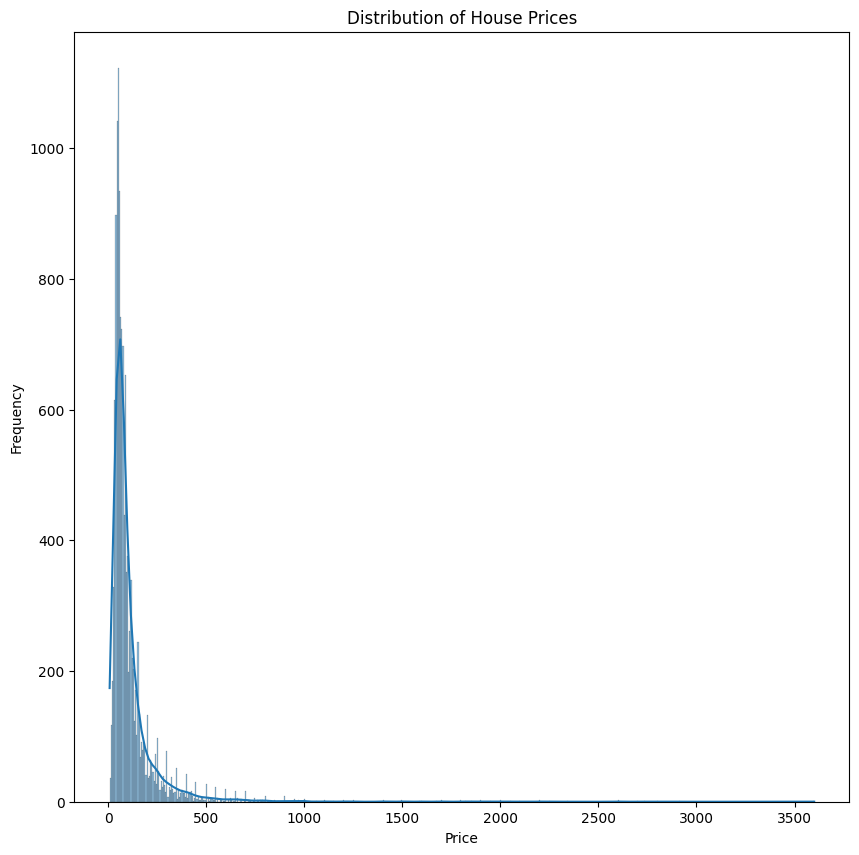

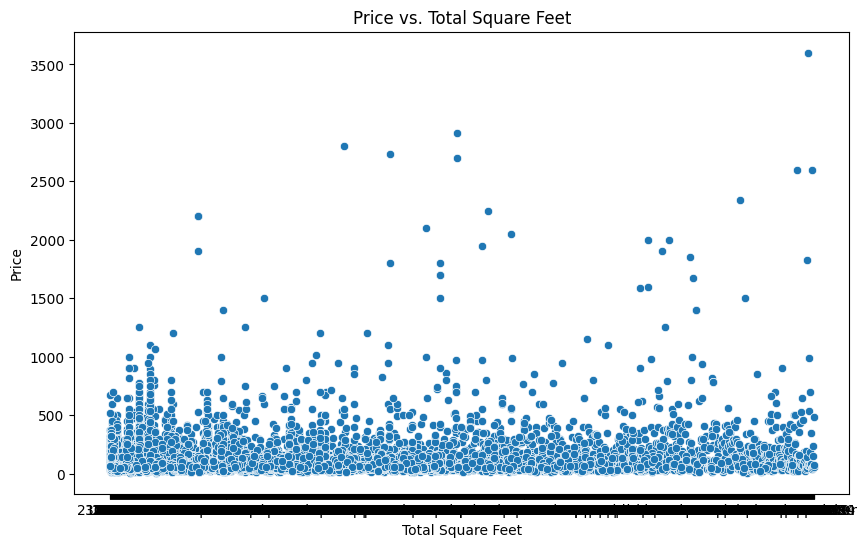

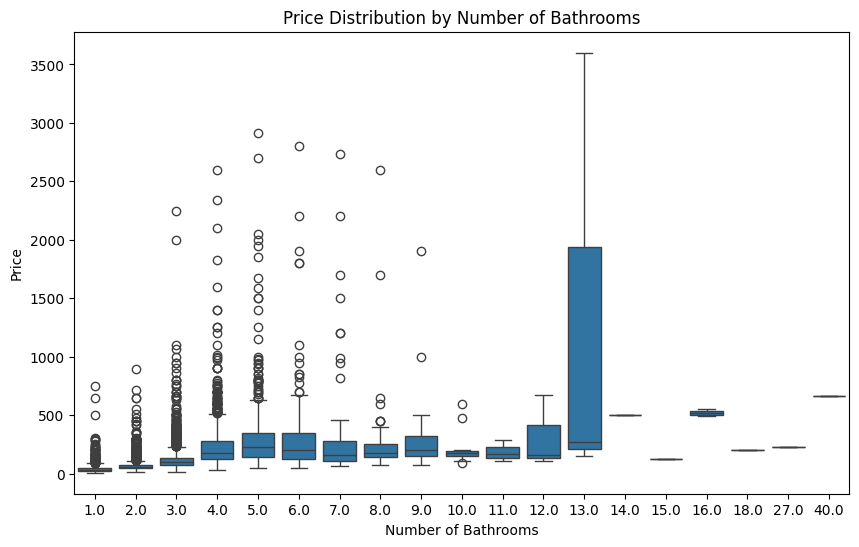

In [36]:


# Example: Histogram of house prices
plt.figure(figsize=(10, 10))  # Adjust figure size
sns.histplot(df['price'], kde=True)  # KDE adds a smooth density curve
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Example: Scatter plot of price vs. total_sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

# Example: Box plot of prices by number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bath', y='price', data=df)
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

In [44]:
# prompt: Give me a function which can test this model remove the NaN values from the data Now test the model with a python function test the model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def test_model(data):
    # Handle missing values (NaN)
    data = data.dropna()

    # Prepare the data
    X = data[['bath']]  # Features (independent variables)
    y = data['price']   # Target variable (dependent variable)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model  # Return the trained model

# Load your data (replace with your actual data loading)
# Assuming 'df' is your DataFrame from previous code
# Example usage:
# model = test_model(df)
# new_data = pd.DataFrame({'bath': [3, 4, 5]})  # Example new data for prediction
# predictions = model.predict(new_data)
# print(predictions)

In [45]:
# prompt: How to test this model

import unittest
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your code is in a file named 'your_script.py'
# and the function 'test_model' is defined within it

# Replace 'your_script' with the actual name of your module if different.

# class TestModel(unittest.TestCase):
#     def setUp(self):
#         # Create a sample DataFrame for testing
#         self.sample_data = pd.DataFrame({'bath': [1, 2, 3, 4, 5], 'price': [100, 200, 300, 400, 500]})

#     def test_model_with_sample_data(self):
#         model = test_model(self.sample_data)
#         self.assertIsInstance(model, LinearRegression)

#         # Test Predictions
#         new_data = pd.DataFrame({'bath': [3,4]})
#         predictions = model.predict(new_data)

#         # Assertions to check model's behavior
#         self.assertGreaterEqual(r2_score(self.sample_data['price'], model.predict(self.sample_data[['bath']])), 0) # r2 must be positive.
#         self.assertGreaterEqual(mean_squared_error(self.sample_data['price'], model.predict(self.sample_data[['bath']])), 0) # mse must be positive
#         # Add more specific assertions based on your expected results.

# if __name__ == '__main__':
#     unittest.main()

def test_model(data):
    # Handle missing values (NaN)
    data = data.dropna()

    # Prepare the data
    X = data[['bath']]  # Features (independent variables)
    y = data['price']   # Target variable (dependent variable)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model  # Return the trained model

# Example usage:
# Assuming df is your DataFrame, and the function 'test_model' is defined
df = pd.DataFrame({'bath': [1, 2, 3, 4, 5], 'price': [100, 200, 300, 400, 500]})

trained_model = test_model(df)

Mean Squared Error: 3.2311742677852644e-27
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
# prompt: Give it some value of bath and then predict price with this model

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def test_model(data):
    # Handle missing values (NaN)
    data = data.dropna()

    # Prepare the data
    X = data[['bath']]  # Features (independent variables)
    y = data['price']   # Target variable (dependent variable)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model  # Return the trained model

# Example usage with user input:
bathrooms = int(input("Enter the number of bathrooms: "))

# Create a sample DataFrame (replace with your actual data if available)
df = pd.DataFrame({'bath': [1, 2, 3, 4, 5], 'price': [100, 200, 300, 400, 500]})

trained_model = test_model(df)

# Make a prediction for the user-provided number of bathrooms
new_data = pd.DataFrame({'bath': [bathrooms]})
predicted_price = trained_model.predict(new_data)
print(f"Predicted price for {bathrooms} bathrooms: {predicted_price[0]}")